In [1]:
import numpy as np 
import pandas as pd 

# Analyzing DataSet

In [2]:
filepath = 'indian_liver_patient.csv'

In [3]:
data = pd.read_csv(filepath)

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**plotting tools**

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Visualizing the features of each category of people (healthy/unhealthy)

<AxesSubplot:title={'center':'Features vs mean values'}>

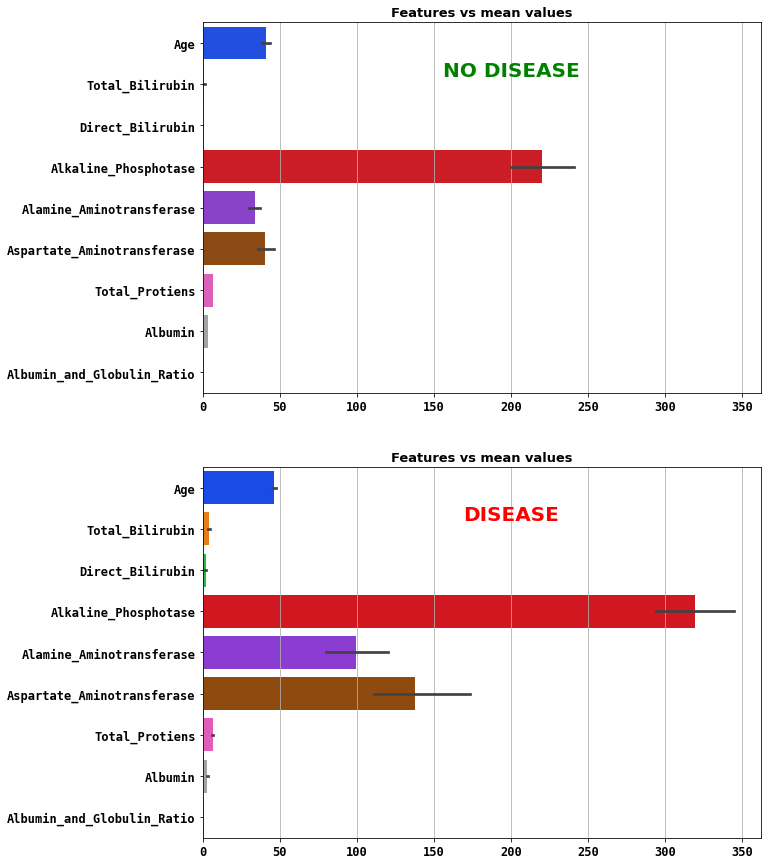

In [6]:
data1 = data[data['Dataset']==2] # no disease (original dataset had it labelled as 2 and not 0)
data1 = data1.iloc[:,:-1]

data2 = data[data['Dataset']==1] # with disease
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'NO DISEASE',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'DISEASE',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80) # with disease




## Visualizing the differences in chemicals in Healthy/Unhealthy people

,Chemicals,Mean_Values,Status
0,Total_Bilirubin,4.164423,Diseased
1,Direct_Bilirubin,1.923558,Diseased
2,Alkaline_Phosphotase,319.007212,Diseased
3,Alamine_Aminotransferase,99.605769,Diseased
4,Aspartate_Aminotransferase,137.699519,Diseased
5,Total_Protiens,6.459135,Diseased
6,Albumin,3.060577,Diseased
7,Albumin_and_Globulin_Ratio,0.914179,Diseased
8,Total_Bilirubin,1.142515,Healthy
9,Direct_Bilirubin,0.396407,Healthy


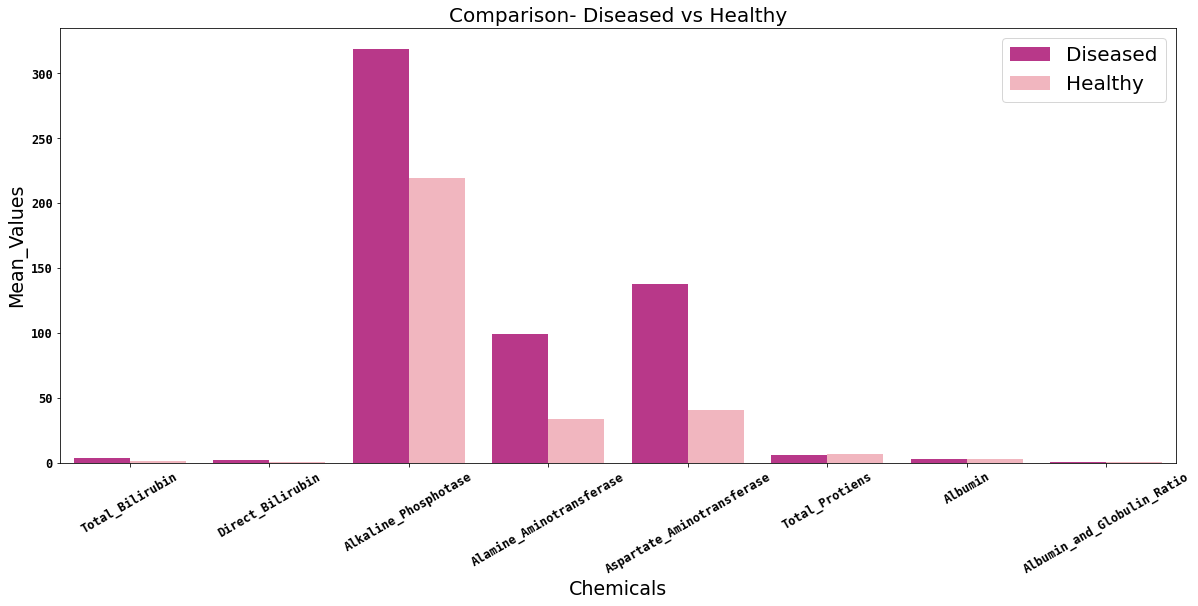

In [7]:
with_disease = data[data['Dataset']==1]

with_disease = with_disease.drop(columns=['Gender','Age','Dataset'])
names1 = with_disease.columns.unique()
mean_of_features1 = with_disease.mean(axis=0,skipna=True)


without_disease = data[data['Dataset']==2]

without_disease = without_disease.drop(columns=['Gender','Age','Dataset'])
names2 = without_disease.columns.unique()
mean_of_features2 = without_disease.mean(axis=0,skipna=True)

people = []

for x,y in zip(names1,mean_of_features1):
    people.append([x,y,'Diseased'])
for x,y in zip(names2,mean_of_features2):
    people.append([x,y,'Healthy'])
    
new_data = pd.DataFrame(people,columns=['Chemicals','Mean_Values','Status'])

#ValueError: If using all scalar values, you must pass an index
#https://stackoverflow.com/questions/17839973/construct-pandas-dataframe-from-values-in-variables

fig = plt.figure(figsize=(20,8))
plt.title('Comparison- Diseased vs Healthy',size=20,loc='center')
plt.xticks(rotation = 30, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

g1 = sns.barplot(x='Chemicals',y='Mean_Values',hue='Status',data=new_data,palette="RdPu_r")
plt.legend(prop={'size': 20})
plt.xlabel('Chemicals',size=19)
plt.ylabel('Mean_Values',size=19)

new_data

## Percentage of Chemicals in Unhealthy People

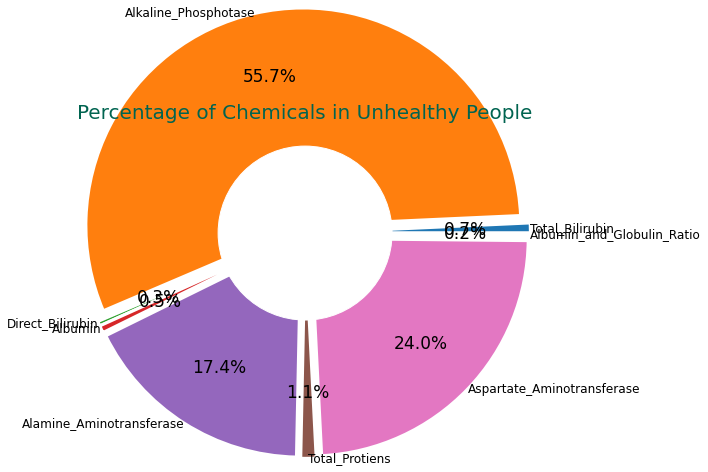

In [8]:
# create data
with_disease = data[data['Dataset']==1]
with_disease = with_disease.drop(columns=['Dataset','Gender','Age'])
names = with_disease.columns.unique()
mean_of_features = with_disease.mean(axis=0,skipna=True)

# I couldn't find a way to automize this list process
# the goal was to arrange numbers in such a way that numbers that are very small compared to 
# others do not stay together
# that is the smaller numbers be embedded between larger numbers
# this helps to visualize pie plot clearly

list_names = ['Total_Bilirubin','Alkaline_Phosphotase','Direct_Bilirubin','Albumin','Alamine_Aminotransferase',
              'Total_Protiens','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
list_means = [4.164423076923075,319.00721153846155,1.923557692307693,3.0605769230769226,
             99.60576923076923,6.459134615384617,137.69951923076923,0.9141787439613527]

l_names = []
l_means = []
mydict = {}
for x,y in zip(names,mean_of_features):
    mydict[x]=y
    l_names.append(x)
    l_means.append(y)


fig = plt.figure()
plt.title('Percentage of Chemicals in Unhealthy People',size=20,color='#016450')
# Create a pieplot
plt.axis('equal')
explode = (0.09,)*(len(list_means))
color_pink=['#7a0177','#ae017e','#dd3497','#f768a1','#fa9fb5','#fcc5c0','#fde0dd','#fff7f3']

wedges, texts, autotexts = plt.pie( list_means,
                                    explode=explode,
                                    labels=list_names, 
                                    labeldistance=1,
                                    textprops=dict(color='k'),
                                    radius=2.5,
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

plt.setp(autotexts,size=17)
plt.setp(texts,size=12)

# plt.show() # don't show pie here [leave it commented]
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

plt.show()

## Other statistics of dataset

[None, None, None, None]

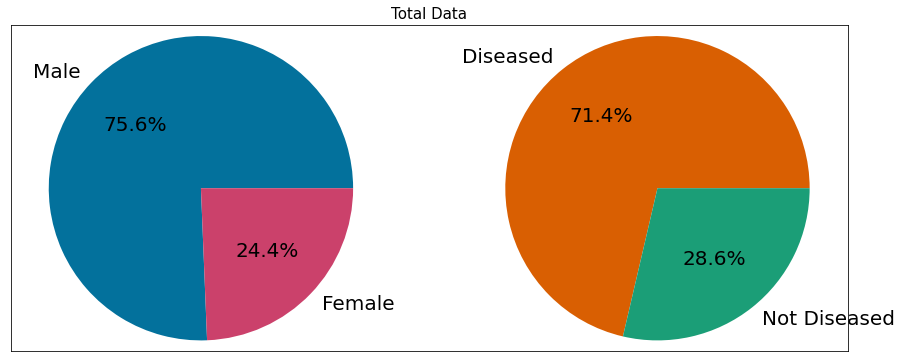

In [9]:
fig= plt.figure(figsize=(15,6),frameon=False) # I don't know why figure boundary is still visible
plt.title("Total Data",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

only_gender = data['Gender']

male_tot = only_gender[only_gender=='Male']

no_of_male = len(male_tot)
no_of_female = len(data) - len(male_tot)

m_vs_f = [no_of_male,no_of_female]


with_disease = data[data['Dataset']==1]
not_with_disease = data[data['Dataset']==2]

with_disease = with_disease['Gender']

no_of_diseased = len(with_disease)
no_of_not_diseased = len(data) - len(with_disease)

d_vs_healthy = [no_of_diseased,no_of_not_diseased]


'''
By default, plots have more pixels along one axis over the other.
When you add a circle, it's traditionally added in data units. 
If your axes have a symmetric range, that means one step along the x axis 
will involve a different number of pixels than one step along your y axis. 
So a symmetric circle in data units is asymmetric in your Pixel units (what you actually see).
'''

# you can force the x and y axes to have equal number of pixels per data unit. 
# This is done using the plt.axis("equal") or ax.axis("equal") methods 
# (where ax is an instance of an Axes). 

ax1.axis('equal')
ax2.axis('equal')

# pie plot
wedges, texts, autotexts= ax1.pie(m_vs_f, 
                                  labels=('Male','Female'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['xkcd:ocean blue','xkcd:dark pink'],
                                  autopct="%1.1f%%")

# pie plot
wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#d95f02','#1b9e77'],
                                  autopct="%1.1f%%")


plt.setp(autotexts,size=20)
plt.setp(texts,size=20)


plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)



## Male vs Female statistics

Text(0, 0.04, 'Female')

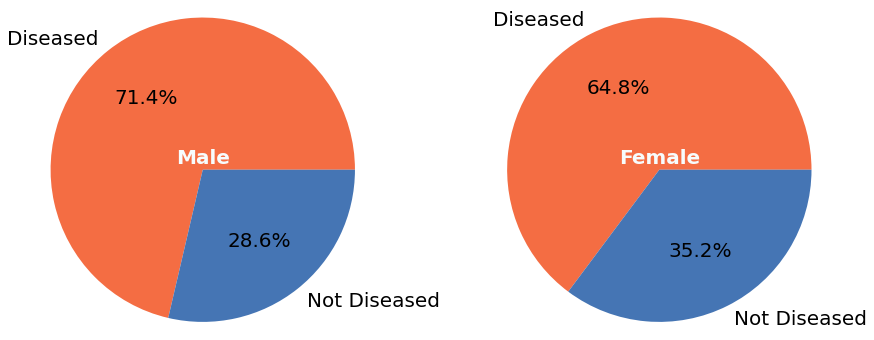

In [10]:
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = data[data['Dataset']==1]
not_with_disease = data[data['Dataset']==2]

with_disease_m = with_disease[with_disease['Gender']=='Male']
with_disease_m = with_disease['Gender']
not_with_disease_m = not_with_disease[not_with_disease['Gender']=='Male']
not_with_disease_m = not_with_disease['Gender']

with_disease_f = with_disease[with_disease['Gender']=='Female']
not_with_disease_f = not_with_disease[not_with_disease['Gender']=='Female']

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')

# Machine Learning

**We need to separate the target values from the rest of the table**

In [11]:
X = data.iloc[:,:-1].values
t = data.iloc[:,-1].values

## Label encoding

Output variable (target)

**1** means **having liver disease**

**2** means **not having liver disease**

***We need to convert all 2's into zeroes for confusion-matrix calulations***

In [12]:
for u in range(len(t)):
    if t[u] == 2:
        t[u] = 0

**Gender column has entries as Male and Female.  For a mathematical model to learn, we have to encode these into numbers.**

In [13]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
X[:,1] = lbl.fit_transform(X[:,1])

## Fill the missing rows with values

In [14]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

**Let's check how many entries have a NaN (Not a Number) or missing values**

In [15]:
data['Albumin_and_Globulin_Ratio'].isnull().sum()

4

In [16]:
missing_values_rows = data[data.isnull().any(axis=1)]
print(missing_values_rows)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        0  
312      4.8        

**Here we fill it by mean of the values of that corresponding column**

In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,9:10] = imp.fit_transform(X[:,9:10])

## Training and Testing data
Let's partition our dataset into **training data** and **testing data**

Here, we keep 25% data as testing data.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X,t,random_state=0,test_size=0.25)

## Feature Scaling

**Standardisation** is applied to all rows of all columns **except the age and the gender column**.


In [19]:
from sklearn. preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:])
X_test[:,2:] = sc.transform(X_test[:,2:])

**Importing Model Evaluation metrics**

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Traning and Predictions

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
# creating object of LogisticRegression class
classifier_logis = LogisticRegression(random_state=0)
# fitting the model/ training the model on training data (X_train,t_train)
classifier_logis.fit(X_train,t_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_logis = classifier_logis.predict(X_test)
# evaluating model performance by confusion-matrix
cm_logis = confusion_matrix(t_test,y_pred_logis)
print(cm_logis)
# accuracy-result of LogisticRegression model
accuracy_logis = accuracy_score(t_test,y_pred_logis)
print('The accuracy of LogisticRegression is : ', str(accuracy_logis*100) , '%')

[[ 8 38]
 [ 7 93]]
The accuracy of LogisticRegression is :  69.17808219178082 %


C:\Users\ayush\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Support Vector Machine - Classification**

In [22]:
from sklearn.svm import SVC
# creating object of SVC class
classifier_svc = SVC(kernel='rbf', random_state=0, gamma='auto')
# fitting the model/ training the model on training data (X_train,t_train)
classifier_svc.fit(X_train,t_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_svc = classifier_svc.predict(X_test)
# evaluating model performance by confusion-matrix
cm_svc = confusion_matrix(t_test,y_pred_svc)
print(cm_svc)
# accuracy-result of SVC model
accuracy_svc = accuracy_score(t_test,y_pred_svc)
print('The accuracy of SupportVectorClassification is : ', str(accuracy_svc*100) , '%')

[[ 4 42]
 [ 5 95]]
The accuracy of SupportVectorClassification is :  67.8082191780822 %


**Random Forest Classification**

In [23]:
from sklearn.ensemble import RandomForestClassifier
# creating object of RandomForestClassifier class
classifier_rfc = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0 )
# fitting the model/ training the model on training data (X_train,t_train)
classifier_rfc.fit(X_train,t_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_rfc = classifier_rfc.predict(X_test)
# evaluating model performance by confusion-matrix
cm_rfc = confusion_matrix(t_test,y_pred_rfc)
print(cm_rfc)
# accuracy-result of RandomForestClassifier model
accuracy_rfc = accuracy_score(t_test,y_pred_rfc)
print('The accuracy of RandomForestClassifier is : ', str(accuracy_rfc*100) , '%')

[[13 33]
 [11 89]]
The accuracy of RandomForestClassifier is :  69.86301369863014 %


## Comparing Model Performance

In [24]:
models_comparison = [['Logistic Regression',accuracy_logis*100],
                     ['Support Vector Classfication',accuracy_svc*100], 
                     ['Random Forest Classifiaction',accuracy_rfc*100]
                    ]
models_compaison_df = pd.DataFrame(models_comparison,columns=['Model','% Accuracy'])
models_compaison_df.head()

,Model,% Accuracy
0,Logistic Regression,69.178082
1,Support Vector Classfication,67.808219
2,Random Forest Classifiaction,69.863014


Text(0.5, 0, 'Model')

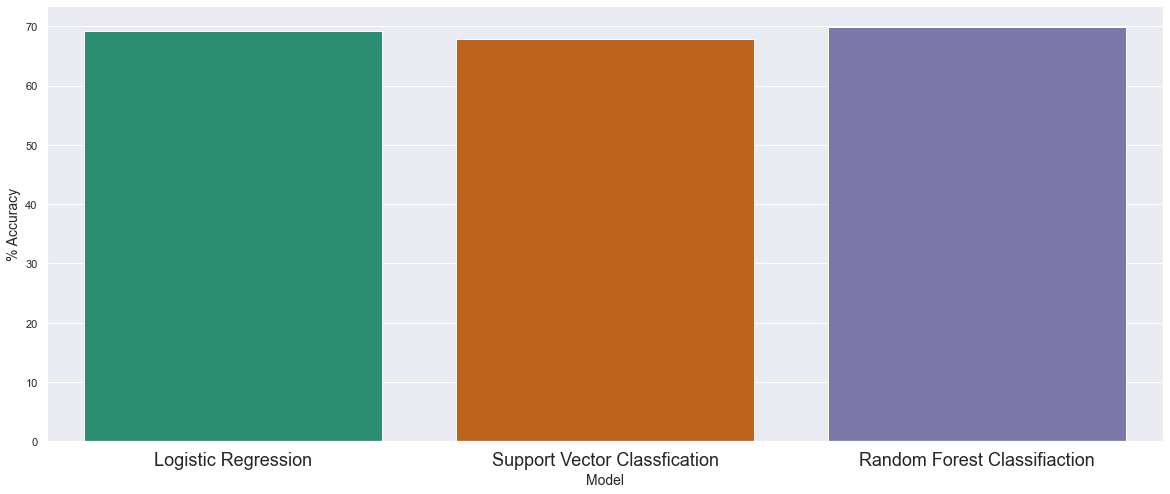

In [25]:
fig = plt.figure(figsize=(20,8))
sns.set()
sns.barplot(x='Model',y='% Accuracy',data=models_compaison_df,palette='Dark2')
plt.xticks(size=18)
plt.ylabel('% Accuracy',size=14)
plt.xlabel('Model',size=14)

## Analysing the effect of number of trees in Random forest to its accuracy

In [26]:
def n_trees_acc(n):
    classifier_rfc = RandomForestClassifier(n_estimators=n, criterion='entropy',random_state=0 )
    classifier_rfc.fit(X_train,t_train)
    y_pred_rfc = classifier_rfc.predict(X_test)
    accuracy_rfc = accuracy_score(t_test,y_pred_rfc)
    return accuracy_rfc*100

In [27]:
n_trees = [10,50,100,200,250,400,500,1000, 2000]
n_trees_acc_score = list(map(n_trees_acc,n_trees))
print(n_trees_acc_score)

[65.06849315068493, 66.43835616438356, 68.4931506849315, 69.17808219178082, 69.86301369863014, 69.86301369863014, 70.54794520547945, 68.4931506849315, 67.8082191780822]


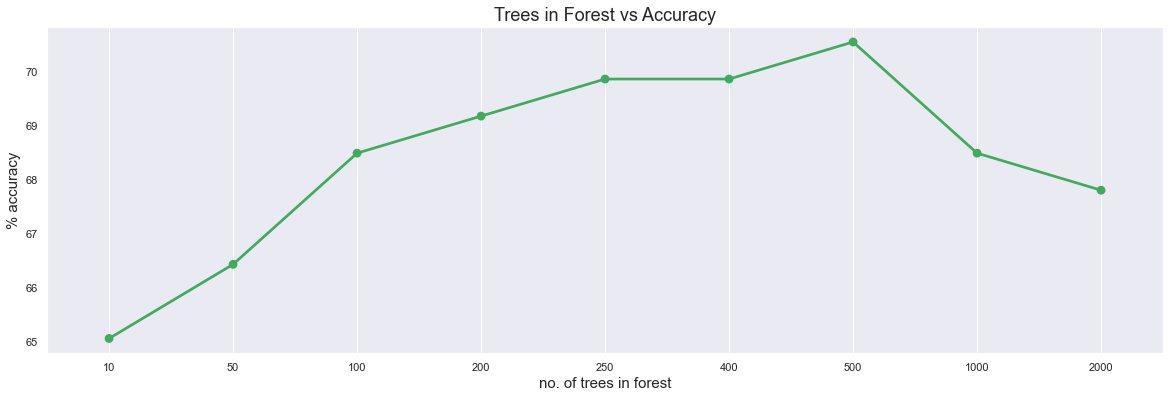

In [28]:
d1 = []
for (x,y) in zip(n_trees,n_trees_acc_score):
    d1.append([x,y])
d2 = pd.DataFrame(d1,columns=['no. of trees in forest','% accuracy'])
fig = plt.figure(figsize=(20,6))
sns.pointplot(x='no. of trees in forest',y='% accuracy',data=d2,color='#41ab5d')
plt.title('Trees in Forest vs Accuracy',size=18)
plt.xlabel('no. of trees in forest',size=15)
plt.ylabel('% accuracy',size=15)
plt.grid()